# Problem 8: K-Nearest-Neighbors Classifier

In this project we will, implement a simple KNN classifier to classify between three classes of wheat seeds using the "Wheat Seeds" dataset.

## Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [37]:
data = './seeds.csv'

df = pd.read_csv(data)

In [38]:
# Separate the features from the target variable
column_names = df.columns.to_numpy()[:-1]
print(column_names)
data = df.to_numpy()
X = data[:, 0:7]
Y = data[:, 7:].reshape(-1).astype(int)
Y

['Area' 'Perimeter' 'Compactness' 'Kernel.Length' 'Kernel.Width'
 'Asymmetry.Coeff' 'Kernel.Groove']


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [39]:
def zscore_normalize(X):
    # Calculate the needed statistics
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Z-score formula
    X_norm = (X - mean) / std
    
    return X_norm

## Preprocessing and Normalization
In this section, we normalize the data using the z-score normalization we implemented before. This will scale all the features to have the same scale and places them in the interval $[-1, 1]$. This will allow for preventing the effects of magnitude of the numerical values of the features having a bigger impact than they should. This also allows for training time to reduce.

In [40]:
X_norm = zscore_normalize(X)

## Split Data
Here we split the data into train/test sets.

In [41]:
# Create a mask for splitting
np.random.seed(30)
numzero = int(0.2 * X.shape[0])
mask = np.array([0] * numzero + [1] * (X.shape[0] - numzero))
np.random.shuffle(mask)

# Split into train/test
X_train = X_norm[mask==1]
X_test = X_norm[mask==0]

Y_train = Y[mask==1]
Y_test = Y[mask==0]

## K-Nearest-Neighbor Classifier

To implement this classifier, we do so by creating a class that gets instantiated by $k$ value. It then can find the $k$ nearest neighbors and put them to vote, to decide for the most common and major class label.

In [42]:
def l2_norm(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self.k_nearest_neighbors(x) for x in X]
        return np.array(y_pred)

    def k_nearest_neighbors(self, x):
        distances = [l2_norm(x, x_train) for x_train in self.X_train]
        k_neighbors = np.argsort(distances)[:self.k]
        k_nearest_neighbors = [self.y_train[i] for i in k_neighbors]
        
        # Voting for the most common class label
        most_common = self.majority_vote(np.array(k_nearest_neighbors))
        return most_common

    def majority_vote(self, labels):
        # Find the most common label
        class_one = labels[labels==1]
        class_two = labels[labels==2]
        class_three = labels[labels==3]
        return np.argmax([class_one.shape[0], class_two.shape[0], class_three.shape[0]]) + 1 

Now, we create 10 different instances of this class using hyper-parameters of $k = 1, 2, \cdots, 10$. Then, by plotting the accuracy of each model, we find out which of these 10 different values for the hyper-parameter $k$, results in more accuracy in classification and prediction.

In [43]:
def accuracy(x, y):
    return np.sum(x==y) / x.shape

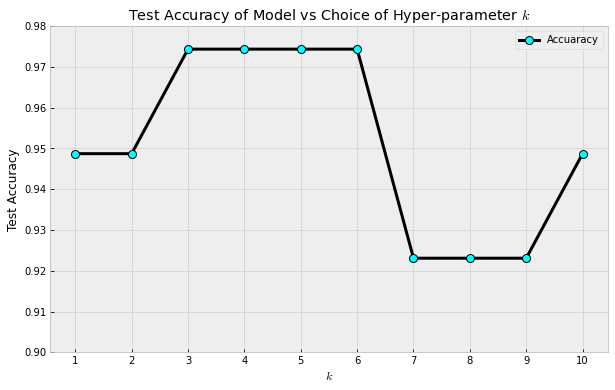

[array([0.94871795]), array([0.94871795]), array([0.97435897]), array([0.97435897]), array([0.97435897]), array([0.97435897]), array([0.92307692]), array([0.92307692]), array([0.92307692]), array([0.94871795])]


In [44]:
accuracy_hist = []
for i in range(1, 11):
    knn = KNN(i)
    knn.fit(X_train, Y_train)
    X_pred = knn.predict(X_test)
    accuracy_hist.append(accuracy(X_pred, Y_test))

plt.style.use("bmh")
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 11)), accuracy_hist, label='Accuaracy', 
         linewidth=3, color="black", marker="o", markersize=8, markerfacecolor="cyan")
plt.title("Test Accuracy of Model vs Choice of Hyper-parameter $k$")
plt.xlabel('$k$')
plt.ylabel('Test Accuracy')
plt.legend()
plt.ylim(0.9, 0.98)
plt.grid(True)
plt.xticks(np.arange(1, 11))
# plt.savefig("data_probl8.png", dpi=200)
plt.show()

print(accuracy_hist)